In [1]:
import pandas as pd, numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# load data
data = pd.read_csv("E:/Pesonal Docs/ML Case study/Lead Scoring Assignment/Leads.csv")
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [6]:
data.shape

(9240, 37)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [9]:
data = data.applymap(lambda s:s.lower() if type(s) == str else s)

In [10]:
# Replacing 'Select' with NaN (Since it means no option is selected)
data = data.replace('select',np.nan)

In [11]:
data.fillna(0, inplace=True)


In [12]:
data.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums             

In [13]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.0,...,no,0,0,02.medium,02.medium,15.0,15.0,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.5,...,no,0,0,02.medium,02.medium,15.0,15.0,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,...,no,potential lead,mumbai,02.medium,01.high,14.0,20.0,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,...,no,0,mumbai,02.medium,01.high,13.0,17.0,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.0,...,no,0,mumbai,02.medium,01.high,15.0,18.0,no,no,modified


In [14]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                             

In [15]:
# Drop columns which has more that 35& thereshold

In [16]:
data.drop(columns=['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Tags','Lead Quality','How did you hear about X Education','City','Lead Number','Prospect ID'],inplace=True)

In [17]:
data.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      18
Country                                            39
Specialization                                     19
What is your current occupation                     7
What matters most to you in choosing a course       4
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement       

In [18]:
data= data.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)


In [19]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,0,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,api,organic search,no,no,0,5.0,674,2.5,email opened,india,...,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,india,...,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,india,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,india,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified


In [20]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

In [21]:
data['Specialization'] = data['Specialization'].fillna('not provided') 
data['What matters most to you in choosing a course'] = data['What matters most to you in choosing a course'].fillna('not provided')
data['Country'] = data['Country'].fillna('not provided')
data['What is your current occupation'] = data['What is your current occupation'].fillna('not provided')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

In [22]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,0,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,api,organic search,no,no,0,5.0,674,2.5,email opened,india,...,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,india,...,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,india,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,india,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified


In [23]:
# lets convert country into three regions
def country_reg(x):
    category = ""
    if x == "india":
        category = "india"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

data['Country'] = data.apply(lambda x:country_reg(x['Country']), axis = 1)
data['Country'].value_counts()

india            6492
outside india    2748
Name: Country, dtype: int64

In [24]:
data.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [25]:
# plots all categorival columns with charts

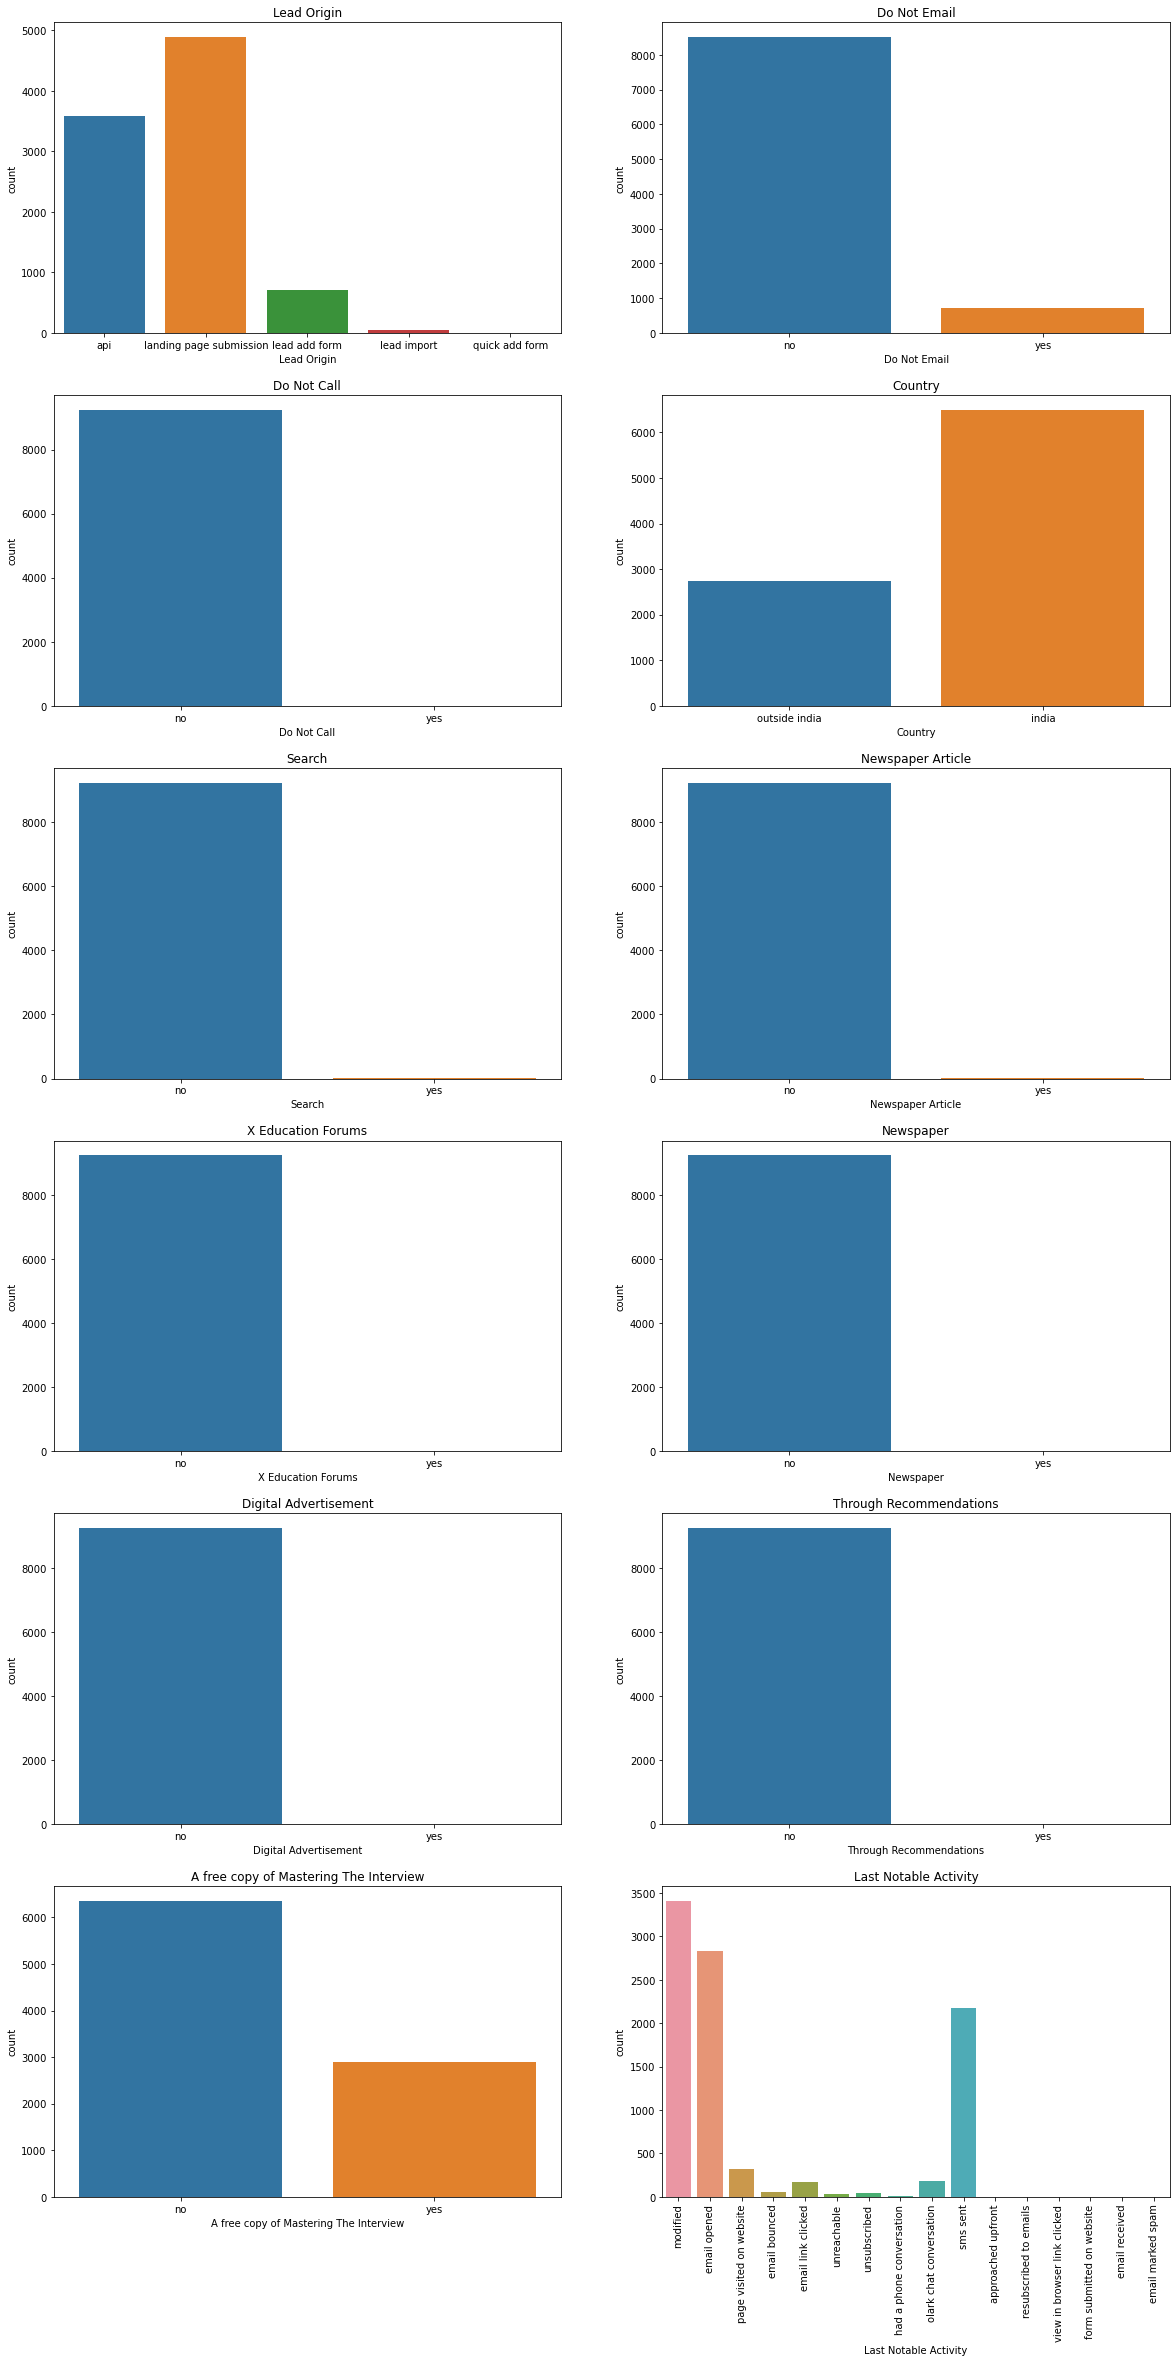

In [26]:

plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(data['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(data['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(data['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(data['Country'])
plt.title('Country')

plt.subplot(6,2,5)
sns.countplot(data['Search'])
plt.title('Search')

plt.subplot(6,2,6)
sns.countplot(data['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(data['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(data['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(data['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(data['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(data['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,12)
sns.countplot(data['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


plt.show()

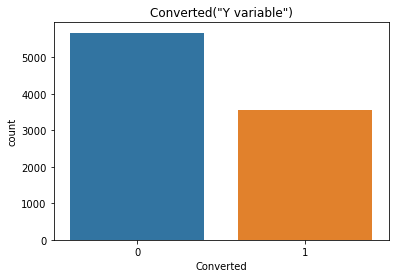

In [27]:
sns.countplot(data['Converted'])
plt.title('Converted("Y variable")')
plt.show()

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

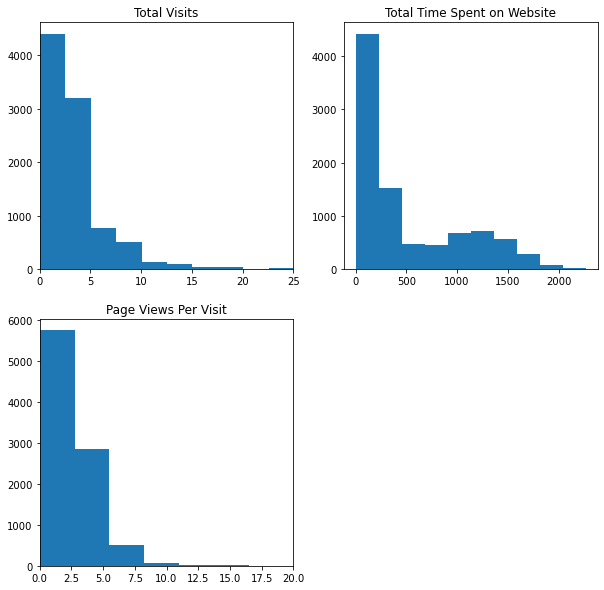

In [29]:

plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(data['TotalVisits'], bins = 100)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(data['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(data['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

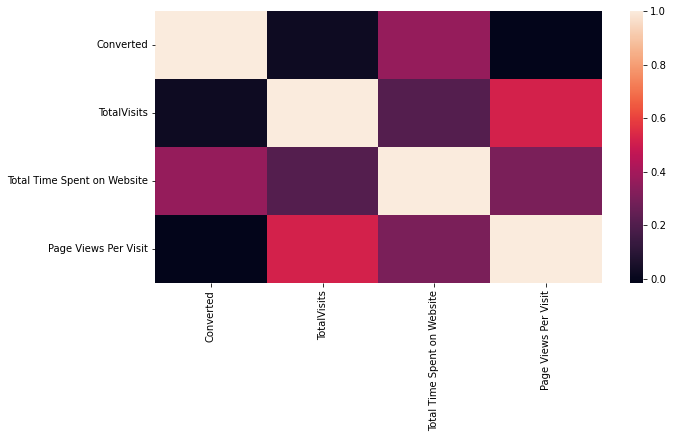

In [30]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr())
plt.show()

In [31]:
dummy = pd.get_dummies(data[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
df_final_dum = pd.concat([data, dummy], axis=1)
df_final_dum

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,api,olark chat,no,no,0,0.0,0,0.00,page visited on website,outside india,...,0,0,1,0,0,0,0,0,0,0
1,api,organic search,no,no,0,5.0,674,2.50,email opened,india,...,0,0,0,0,0,0,0,0,0,0
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.00,email opened,india,...,0,0,0,0,0,0,0,0,0,0
3,landing page submission,direct traffic,no,no,0,1.0,305,1.00,unreachable,india,...,0,0,1,0,0,0,0,0,0,0
4,landing page submission,google,no,no,1,2.0,1428,1.00,converted to lead,india,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,landing page submission,direct traffic,yes,no,1,8.0,1845,2.67,email marked spam,outside india,...,0,0,0,0,0,0,0,0,0,0
9236,landing page submission,direct traffic,no,no,0,2.0,238,2.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0
9237,landing page submission,direct traffic,yes,no,0,2.0,199,2.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0
9238,landing page submission,google,no,no,1,3.0,499,3.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0


In [32]:
df_final_dum = df_final_dum.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 
                                  'Specialization', 'What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
df_final_dum


,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Origin_quick add form,"Specialization_banking, investment and insurance",Specialization_business administration,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X = df_final_dum.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Origin_quick add form,"Specialization_banking, investment and insurance",Specialization_business administration,Specialization_e-business,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [35]:
# Putting the target variable in y
y = df_final_dum['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Origin_quick add form,"Specialization_banking, investment and insurance",Specialization_business administration,Specialization_e-business,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
1871,-0.645678,-0.885371,-1.062143,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6795,0.109111,0.005716,-0.452487,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3516,0.297808,-0.691418,0.083827,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8105,0.297808,1.365219,1.229797,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3934,-0.645678,-0.885371,-1.062143,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


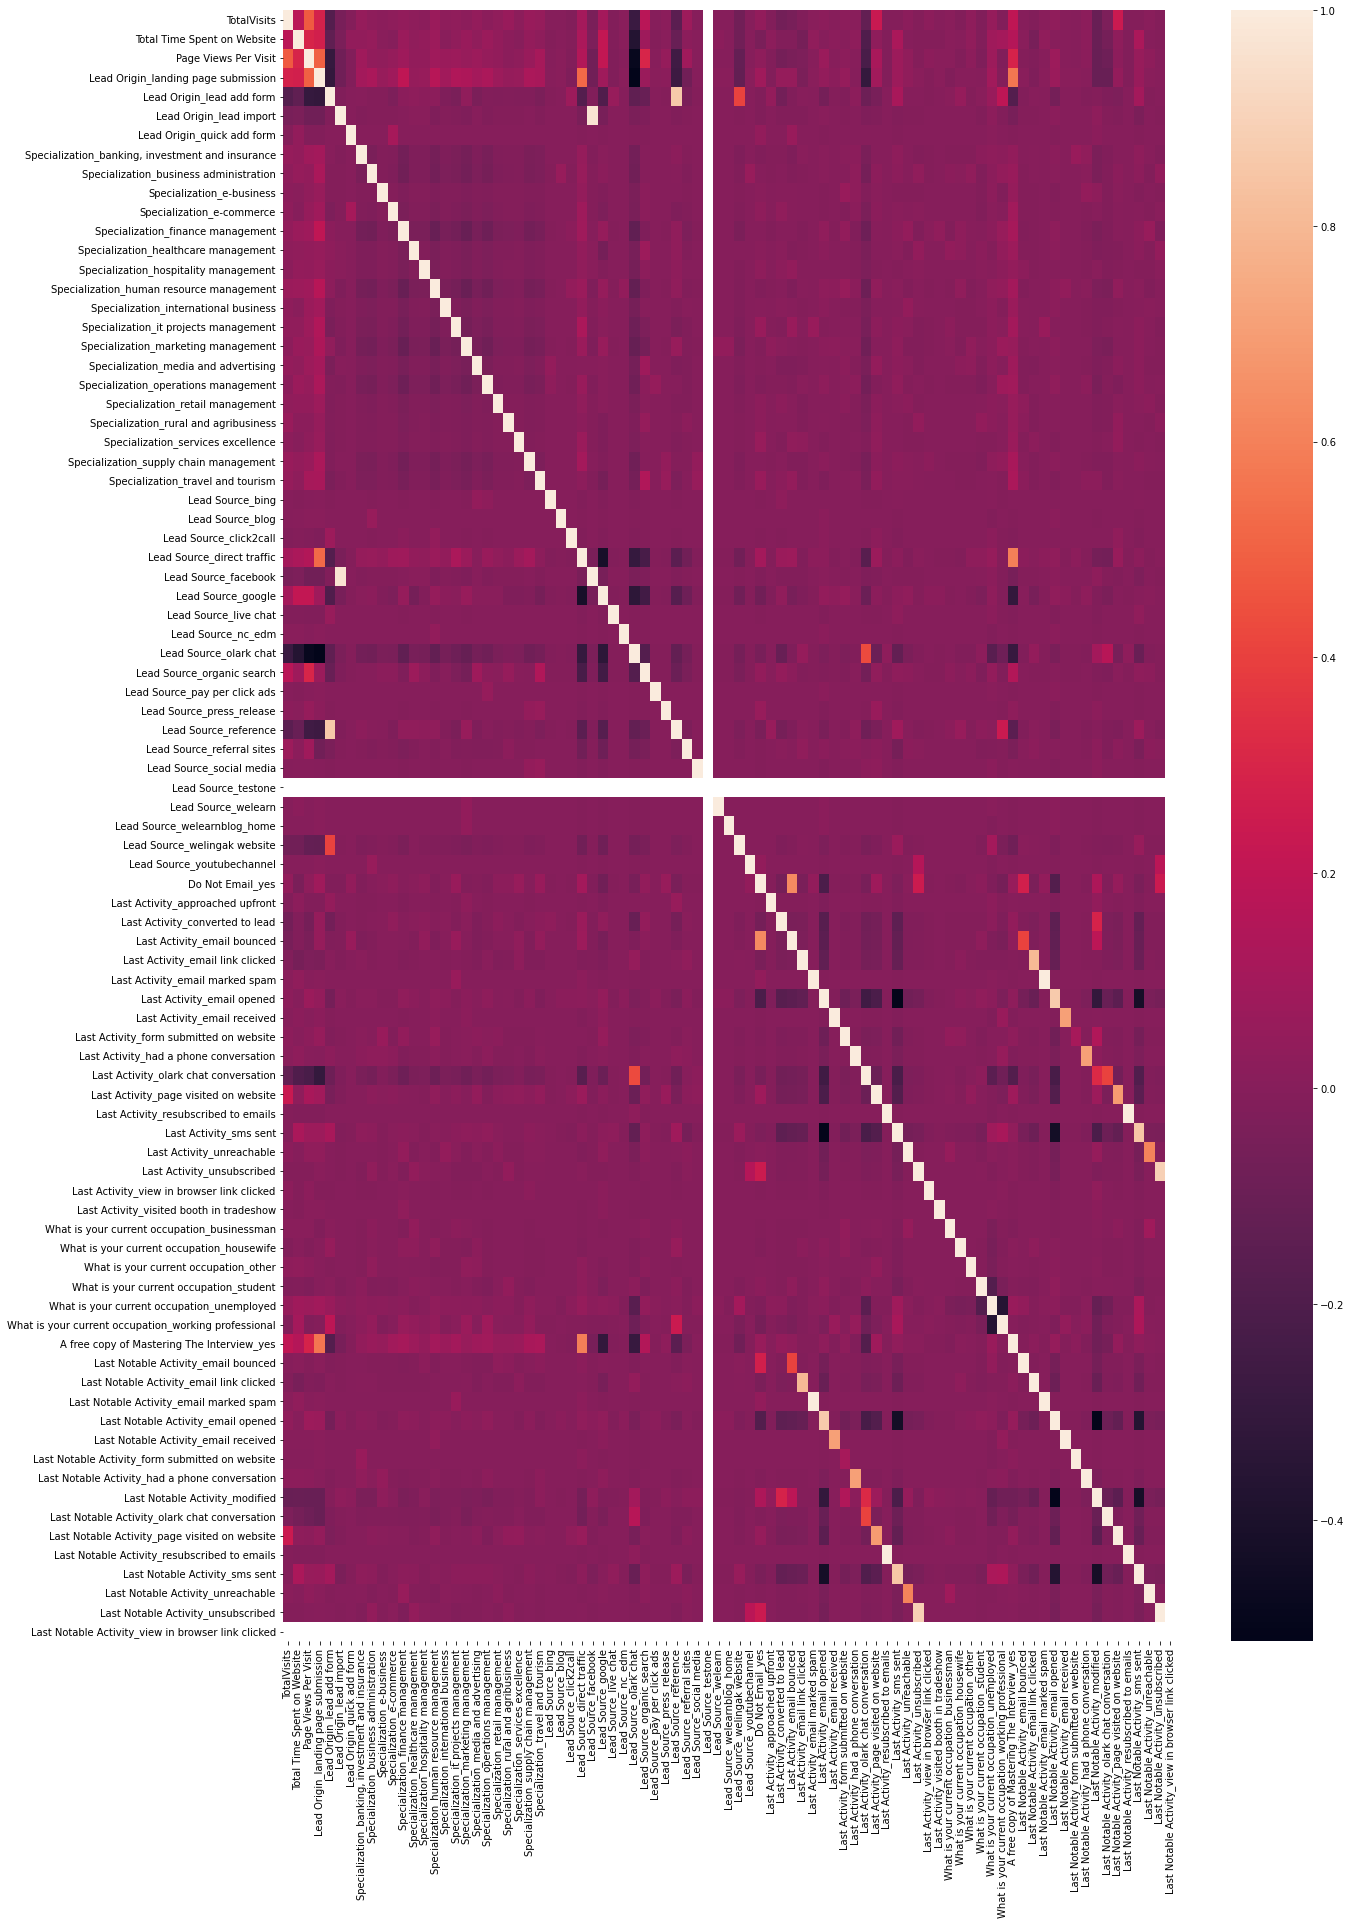

In [39]:
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr())
plt.show()

In [40]:
# there are many columns we will delete columns by RFE

In [41]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [42]:
from sklearn.feature_selection import RFE


In [43]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Origin_quick add form,"Specialization_banking, investment and insurance",Specialization_business administration,Specialization_e-business,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
1871,-0.645678,-0.885371,-1.062143,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6795,0.109111,0.005716,-0.452487,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3516,0.297808,-0.691418,0.083827,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8105,0.297808,1.365219,1.229797,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3934,-0.645678,-0.885371,-1.062143,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [44]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6468 entries, 1871 to 5640
Data columns (total 85 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6468 non-null   float64
 1   Total Time Spent on Website                           6468 non-null   float64
 2   Page Views Per Visit                                  6468 non-null   float64
 3   Lead Origin_landing page submission                   6468 non-null   uint8  
 4   Lead Origin_lead add form                             6468 non-null   uint8  
 5   Lead Origin_lead import                               6468 non-null   uint8  
 6   Lead Origin_quick add form                            6468 non-null   uint8  
 7   Specialization_banking, investment and insurance      6468 non-null   uint8  
 8   Specialization_business administration                6

In [45]:
# Running RFE with 15 variables as output
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [46]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', False, 53),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 54),
 ('Lead Origin_landing page submission', False, 19),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 42),
 ('Lead Origin_quick add form', False, 56),
 ('Specialization_banking, investment and insurance', False, 17),
 ('Specialization_business administration', False, 28),
 ('Specialization_e-business', False, 22),
 ('Specialization_e-commerce', False, 14),
 ('Specialization_finance management', False, 18),
 ('Specialization_healthcare management', False, 15),
 ('Specialization_hospitality management', False, 55),
 ('Specialization_human resource management', False, 25),
 ('Specialization_international business', False, 38),
 ('Specialization_it projects management', False, 16),
 ('Specialization_marketing management', False, 23),
 ('Specialization_media and advertising', False, 20),
 ('Specialization_operations management', False, 26),
 ('Specializat

In [47]:
col = X_train.columns[rfe.support_]

In [48]:
col

Index(['Total Time Spent on Website', 'Lead Origin_lead add form',
       'Lead Source_welingak website', 'Do Not Email_yes',
       'Last Activity_approached upfront',
       'Last Activity_had a phone conversation', 'Last Activity_sms sent',
       'What is your current occupation_housewife',
       'What is your current occupation_student',
       'What is your current occupation_unemployed',
       'What is your current occupation_working professional',
       'Last Notable Activity_had a phone conversation',
       'Last Notable Activity_modified',
       'Last Notable Activity_olark chat conversation',
       'Last Notable Activity_unreachable'],
      dtype='object')

In [49]:
import statsmodels.api as sm

In [50]:
X_train = X_train[col]


In [51]:
X_train

,Total Time Spent on Website,Lead Origin_lead add form,Lead Source_welingak website,Do Not Email_yes,Last Activity_approached upfront,Last Activity_had a phone conversation,Last Activity_sms sent,What is your current occupation_housewife,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_unreachable
1871,-0.885371,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6795,0.005716,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3516,-0.691418,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8105,1.365219,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3934,-0.885371,0,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,-0.885371,1,0,0,0,0,0,0,0,1,0,0,0,0,0
79,0.404601,1,0,0,0,0,0,0,0,0,1,0,1,0,0
8039,-0.885371,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6936,-0.449891,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [52]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2687.7
Date:                Sat, 21 Jan 2023   Deviance:                       5375.4
Time:                        14:33:25   Pearson chi2:                 6.56e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3924
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7293      0.085    -20.274      0.000      -1.897      -1.562
Total Time Spent on Website                              0.9112      0.035     26.168      0.000       0.843       0.979
Lead Origin_lead add form                                3.1591      0.186     17.009      0.000       2.795       3.523
Lead Source_welingak website                             1.8922      0.741      2.552      0.011       0.439       3.345
Do Not Email_yes                                        -1.2523      0.163     -7.686      0.000      -1.572      -0.933
Last Activity_approached upfront                        24.0510   2.65e+04      0.001      0.999   -5.19e+04    5.19e+04
Last Activity_had a phone conversation                   1.1035      0.932      1.184      0.237      -0.724       2.931
Last Activity_sms sent                                   1.1928      0.073     16.368      0.000       1.050       1.336
What is your current occupation_housewife               24.6964   2.32e+04      0.001      0.999   -4.54e+04    4.55e+04
What is your current occupation_student                  1.1286      0.240      4.707      0.000       0.659       1.599
What is your current occupation_unemployed               0.9582      0.085     11.235      0.000       0.791       1.125
What is your current occupation_working professional     3.4807      0.197     17.690      0.000       3.095       3.866
Last Notable Activity_had a phone conversation           2.0050      1.442      1.390      0.164      -0.821       4.831
Last Notable Activity_modified                          -0.8801      0.078    -11.250      0.000      -1.033      -0.727
Last Notable Activity_olark chat conversation           -0.6132      0.323     -1.900      0.057      -1.246       0.019
Last Notable Activity_unreachable                        1.6709      0.522      3.201      0.001       0.648       2.694
========================================================================================================================
"""

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [54]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Last Activity_had a phone conversation,2.02
11,Last Notable Activity_had a phone conversation,2.01
9,What is your current occupation_unemployed,1.65
1,Lead Origin_lead add form,1.46
6,Last Activity_sms sent,1.43
12,Last Notable Activity_modified,1.32
2,Lead Source_welingak website,1.24
10,What is your current occupation_working profes...,1.22
3,Do Not Email_yes,1.10
0,Total Time Spent on Website,1.08


In [55]:
# What is your current occupation_housewife
# has highest p-value and also near least VIF so let's drop this
X_train.drop('What is your current occupation_housewife', axis = 1, inplace = True)

In [56]:
X_train.head()

,Total Time Spent on Website,Lead Origin_lead add form,Lead Source_welingak website,Do Not Email_yes,Last Activity_approached upfront,Last Activity_had a phone conversation,Last Activity_sms sent,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_unreachable
1871,-0.885371,0,0,0,0,0,0,0,1,0,0,0,0,0
6795,0.005716,0,0,0,0,0,0,0,1,0,0,0,0,0
3516,-0.691418,0,0,0,0,0,0,0,1,0,0,0,0,0
8105,1.365219,0,0,0,0,0,1,0,1,0,0,0,0,0
3934,-0.885371,0,0,0,0,0,0,0,1,0,0,1,0,0


In [57]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2698.8
Date:                Sat, 21 Jan 2023   Deviance:                       5397.5
Time:                        14:38:36   Pearson chi2:                 6.60e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3903
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6965      0.084    -20.121      0.000      -1.862      -1.531
Total Time Spent on Website                              0.9115      0.035     26.225      0.000       0.843       0.980
Lead Origin_lead add form                                3.2081      0.186     17.289      0.000       2.844       3.572
Lead Source_welingak website                             1.8466      0.741      2.490      0.013       0.393       3.300
Do Not Email_yes                                        -1.2601      0.163     -7.730      0.000      -1.580      -0.941
Last Activity_approached upfront                        23.0420    1.6e+04      0.001      0.999   -3.14e+04    3.14e+04
Last Activity_had a phone conversation                   1.0888      0.933      1.167      0.243      -0.740       2.917
Last Activity_sms sent                                   1.1836      0.073     16.266      0.000       1.041       1.326
What is your current occupation_student                  1.0942      0.240      4.566      0.000       0.624       1.564
What is your current occupation_unemployed               0.9267      0.084     10.977      0.000       0.761       1.092
What is your current occupation_working professional     3.4478      0.196     17.557      0.000       3.063       3.833
Last Notable Activity_had a phone conversation           2.0111      1.442      1.395      0.163      -0.815       4.837
Last Notable Activity_modified                          -0.8788      0.078    -11.265      0.000      -1.032      -0.726
Last Notable Activity_olark chat conversation           -0.6269      0.322     -1.945      0.052      -1.259       0.005
Last Notable Activity_unreachable                        1.6558      0.521      3.177      0.001       0.634       2.677
========================================================================================================================
"""

In [61]:
X_train.columns

Index(['Total Time Spent on Website', 'Lead Origin_lead add form',
       'Lead Source_welingak website', 'Do Not Email_yes',
       'Last Activity_approached upfront',
       'Last Activity_had a phone conversation', 'Last Activity_sms sent',
       'What is your current occupation_student',
       'What is your current occupation_unemployed',
       'What is your current occupation_working professional',
       'Last Notable Activity_had a phone conversation',
       'Last Notable Activity_modified',
       'Last Notable Activity_olark chat conversation',
       'Last Notable Activity_unreachable'],
      dtype='object')

In [62]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Last Activity_had a phone conversation,2.02
10,Last Notable Activity_had a phone conversation,2.01
8,What is your current occupation_unemployed,1.65
1,Lead Origin_lead add form,1.45
6,Last Activity_sms sent,1.43
11,Last Notable Activity_modified,1.32
2,Lead Source_welingak website,1.24
9,What is your current occupation_working profes...,1.21
3,Do Not Email_yes,1.10
0,Total Time Spent on Website,1.08


In [63]:
# Last Activity_approached upfront
# What is your current occupation_housewife
# has highest p-value and also near least VIF so let's drop this
X_train.drop('Last Activity_approached upfront', axis = 1, inplace = True)



In [64]:
X_train.head()

,Total Time Spent on Website,Lead Origin_lead add form,Lead Source_welingak website,Do Not Email_yes,Last Activity_had a phone conversation,Last Activity_sms sent,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_unreachable
1871,-0.885371,0,0,0,0,0,0,1,0,0,0,0,0
6795,0.005716,0,0,0,0,0,0,1,0,0,0,0,0
3516,-0.691418,0,0,0,0,0,0,1,0,0,0,0,0
8105,1.365219,0,0,0,0,1,0,1,0,0,0,0,0
3934,-0.885371,0,0,0,0,0,0,1,0,0,1,0,0


In [65]:
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2703.3
Date:                Sat, 21 Jan 2023   Deviance:                       5406.6
Time:                        15:01:21   Pearson chi2:                 6.61e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3895
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6988      0.084    -20.147      0.000      -1.864      -1.533
Total Time Spent on Website                              0.9122      0.035     26.268      0.000       0.844       0.980
Lead Origin_lead add form                                3.2155      0.185     17.358      0.000       2.852       3.579
Lead Source_welingak website                             1.8354      0.741      2.476      0.013       0.382       3.289
Do Not Email_yes                                        -1.2643      0.163     -7.756      0.000      -1.584      -0.945
Last Activity_had a phone conversation                   1.0772      0.933      1.154      0.248      -0.752       2.907
Last Activity_sms sent                                   1.1805      0.073     16.227      0.000       1.038       1.323
What is your current occupation_student                  1.0940      0.240      4.566      0.000       0.624       1.564
What is your current occupation_unemployed               0.9312      0.084     11.036      0.000       0.766       1.097
What is your current occupation_working professional     3.4474      0.196     17.559      0.000       3.063       3.832
Last Notable Activity_had a phone conversation           2.0217      1.442      1.402      0.161      -0.805       4.848
Last Notable Activity_modified                          -0.8690      0.078    -11.165      0.000      -1.022      -0.716
Last Notable Activity_olark chat conversation           -0.6273      0.322     -1.945      0.052      -1.259       0.005
Last Notable Activity_unreachable                        1.6558      0.521      3.176      0.001       0.634       2.678
========================================================================================================================
"""

In [66]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Last Activity_had a phone conversation,2.02
9,Last Notable Activity_had a phone conversation,2.01
7,What is your current occupation_unemployed,1.65
1,Lead Origin_lead add form,1.45
5,Last Activity_sms sent,1.43
10,Last Notable Activity_modified,1.32
2,Lead Source_welingak website,1.24
8,What is your current occupation_working profes...,1.21
3,Do Not Email_yes,1.10
0,Total Time Spent on Website,1.08


In [67]:
# Last Activity_had a phone conversation 
# has highest p values
X_train.drop('Last Activity_had a phone conversation', axis = 1, inplace = True)


In [71]:
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2704.0
Date:                Sat, 21 Jan 2023   Deviance:                       5408.0
Time:                        15:18:58   Pearson chi2:                 6.45e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3894
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6990      0.084    -20.150      0.000      -1.864      -1.534
Total Time Spent on Website                              0.9131      0.035     26.300      0.000       0.845       0.981
Lead Origin_lead add form                                3.2208      0.185     17.388      0.000       2.858       3.584
Lead Source_welingak website                             1.8292      0.741      2.467      0.014       0.376       3.282
Do Not Email_yes                                        -1.2655      0.163     -7.760      0.000      -1.585      -0.946
Last Activity_sms sent                                   1.1789      0.073     16.207      0.000       1.036       1.321
What is your current occupation_student                  1.0929      0.240      4.561      0.000       0.623       1.563
What is your current occupation_unemployed               0.9319      0.084     11.046      0.000       0.767       1.097
What is your current occupation_working professional     3.4537      0.196     17.603      0.000       3.069       3.838
Last Notable Activity_had a phone conversation           3.0990      1.100      2.818      0.005       0.944       5.254
Last Notable Activity_modified                          -0.8640      0.078    -11.122      0.000      -1.016      -0.712
Last Notable Activity_olark chat conversation           -0.6275      0.323     -1.945      0.052      -1.260       0.005
Last Notable Activity_unreachable                        1.6559      0.521      3.175      0.001       0.634       2.678
========================================================================================================================
"""

In [72]:
# All p-values are less than 0.05

In [70]:
# Prediction data

# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.17142837, 0.31823317, 0.19806333, 0.84001375, 0.08020932,
       0.9903827 , 0.19254963, 0.97962388, 0.11817729, 0.9015597 ])

In [73]:
X_train.columns

Index(['Total Time Spent on Website', 'Lead Origin_lead add form',
       'Lead Source_welingak website', 'Do Not Email_yes',
       'Last Activity_sms sent', 'What is your current occupation_student',
       'What is your current occupation_unemployed',
       'What is your current occupation_working professional',
       'Last Notable Activity_had a phone conversation',
       'Last Notable Activity_modified',
       'Last Notable Activity_olark chat conversation',
       'Last Notable Activity_unreachable'],
      dtype='object')

In [74]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.171428
1,0,0.318233
2,0,0.198063
3,0,0.840014
4,0,0.080209


In [75]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,predicted
0,0,0.171428,0
1,0,0.318233,0
2,0,0.198063,0
3,0,0.840014,1
4,0,0.080209,0


In [76]:
from sklearn import metrics


In [77]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8024118738404453


In [78]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
confusion

array([[3530,  472],
       [ 806, 1660]], dtype=int64)

In [ ]:
# Metrics beyond simply accuracy

In [79]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [80]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6731549067315491

In [81]:
# Let us calculate specificity
TN / float(TN+FP)

0.8820589705147426

In [82]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.11794102948525736


In [83]:
# positive predictive value 
print (TP / float(TP+FP))

0.7786116322701688


In [84]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8141143911439115


In [85]:
# Plotting the ROC Curve

In [86]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [88]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

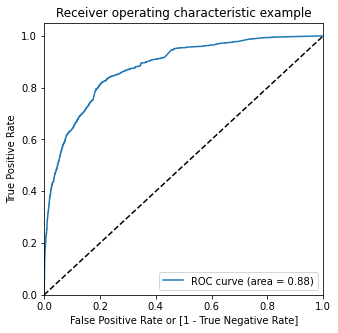

In [90]:
# call ROC curve 
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [91]:
#  Finding Optimal Cutoff Point


In [92]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.171428,0,1,1,0,0,0,0,0,0,0,0
1,0,0.318233,0,1,1,1,1,0,0,0,0,0,0
2,0,0.198063,0,1,1,0,0,0,0,0,0,0,0
3,0,0.840014,1,1,1,1,1,1,1,1,1,1,0
4,0,0.080209,0,1,0,0,0,0,0,0,0,0,0


In [94]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.381262,1.000000,0.000000
0.1,0.1,0.609771,0.966342,0.390055
0.2,0.2,0.736549,0.898621,0.636682
0.3,0.3,0.797001,0.836172,0.772864
0.4,0.4,0.805968,0.789538,0.816092
0.5,0.5,0.802412,0.673155,0.882059
0.6,0.6,0.799165,0.593268,0.926037
0.7,0.7,0.781849,0.508516,0.950275
0.8,0.8,0.761905,0.418491,0.973513
0.9,0.9,0.712585,0.261963,0.990255


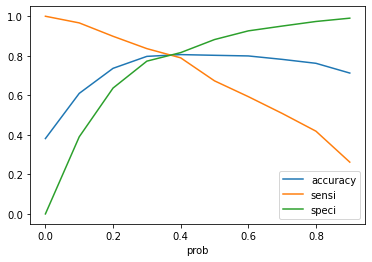

In [95]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [96]:
#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [97]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.171428,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.318233,0,1,1,1,1,0,0,0,0,0,0,0
2,0,0.198063,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.840014,1,1,1,1,1,1,1,1,1,1,0,0
4,0,0.080209,0,1,0,0,0,0,0,0,0,0,0,0


In [98]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

1.0

In [100]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[4002,    0],
       [   0, 2466]], dtype=int64)

In [101]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [102]:
# Calculating the sensitivity
TP/(TP+FN)

1.0

In [103]:
# Calculating the specificity
TN/(TN+FP)

1.0

In [104]:
#  Prediction on Test set

In [105]:
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [106]:
# Substituting all the columns in the final train model
col = X_train.columns


In [107]:
col

Index(['Total Time Spent on Website', 'Lead Origin_lead add form',
       'Lead Source_welingak website', 'Do Not Email_yes',
       'Last Activity_sms sent', 'What is your current occupation_student',
       'What is your current occupation_unemployed',
       'What is your current occupation_working professional',
       'Last Notable Activity_had a phone conversation',
       'Last Notable Activity_modified',
       'Last Notable Activity_olark chat conversation',
       'Last Notable Activity_unreachable'],
      dtype='object')

In [108]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm

,const,Total Time Spent on Website,Lead Origin_lead add form,Lead Source_welingak website,Do Not Email_yes,Last Activity_sms sent,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_unreachable
4269,1.0,0.964504,0,0,0,1,0,0,0,0,0,0,0
2376,1.0,-0.885371,1,0,0,1,0,1,0,0,0,0,0
7766,1.0,-0.777416,0,0,0,0,0,0,1,0,0,0,1
9199,1.0,-0.885371,0,0,0,0,0,1,0,0,1,0,0
4359,1.0,-0.885371,1,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8649,1.0,-0.354744,0,0,0,0,0,0,0,0,0,0,0
2152,1.0,-0.885371,1,0,0,1,0,1,0,0,0,0,0
7101,1.0,-0.885371,0,0,0,0,0,1,0,0,0,0,0
5331,1.0,2.056864,0,0,1,0,0,0,0,0,1,0,0


In [109]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

4269    0.589166
2376    0.943969
7766    0.937069
9199    0.080209
4359    0.838254
9186    0.651544
1631    0.529189
8963    0.244570
8007    0.057502
5324    0.467713
dtype: float64

In [110]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [111]:
# Let's see the head
y_pred_1.head()

,0
4269,0.589166
2376,0.943969
7766,0.937069
9199,0.080209
4359,0.838254


In [112]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [113]:
# Remove index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [114]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [115]:
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.589166
1,1,0.943969
2,1,0.937069
3,0,0.080209
4,1,0.838254


In [116]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,1,0.589166,1
1,1,0.943969,1
2,1,0.937069,1
3,0,0.080209,0
4,1,0.838254,1
...,...,...,...
2767,0,0.116813,0
2768,1,0.943969,1
2769,0,0.171428,0
2770,0,0.124508,0


In [117]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8124098124098124

In [118]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1356,  321],
       [ 199,  896]], dtype=int64)

In [119]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [120]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8182648401826484

In [121]:
# Let us calculate specificity
TN / float(TN+FP)

0.8085867620751341

In [122]:
#Precision and Recall

In [124]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3530,  472],
       [ 806, 1660]], dtype=int64)

In [125]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7786116322701688

In [126]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6731549067315491

In [127]:
from sklearn.metrics import precision_score, recall_score

In [128]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7786116322701688

In [129]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6731549067315491

In [130]:
# Precision and recall tradeoff


In [131]:
from sklearn.metrics import precision_recall_curve

In [132]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: predicted, Length: 6468, dtype: int64)

In [134]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

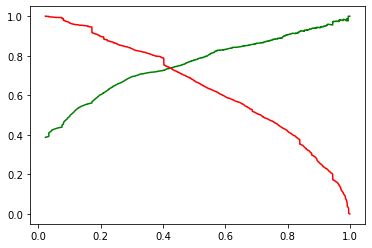

In [135]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()